# Calling Python from Julia

First, let's install and import PyCall:

In [1]:
# Run once to install PyCall
import Pkg
Pkg.add("PyCall")

# Import PyCall
using PyCall

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


### Basic Python Import and Usage

In [2]:
# Import Python's math module
math = pyimport("math")

# Use Python functions
println("Value of π from Python: ", math.pi)
println("Cosine of π from Python: ", math.cos(math.pi))

Value of π from Python: 3.141592653589793
Cosine of π from Python: -1.0


PyCall is using its own Python environment, which means we have to install packages we may want to use. 

```julia 
import Pkg; Pkg.add("Conda")

# Install required packages for julia-python plotting integration
import Pkg; Pkg.add(["PyPlot"])

# Install additional dependencies
using Conda
Conda.add("pandas")
Conda.add("matplotlib")
Conda.add("ipykernel")
Conda.add("ipympl")  # Adds interactive matplotlib support

# Now import should work
plt = pyimport("matplotlib.pyplot")
pd = plt = pyimport("pandas")

NumPy array: [1, 2, 3, 4, 5]
NumPy array mean: 3.0


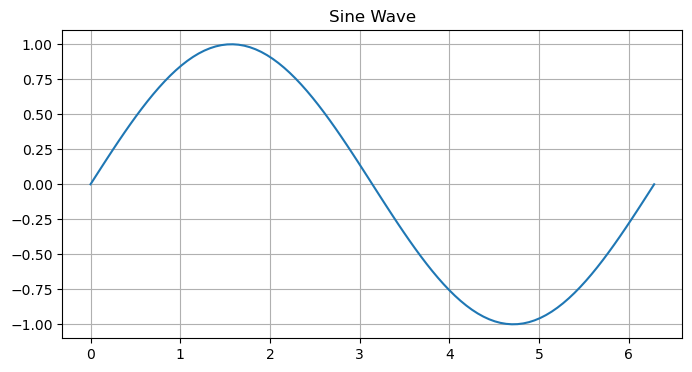

In [3]:
# Import NumPy
np = pyimport("numpy")

# Create a NumPy array
py_array = np.array([1, 2, 3, 4, 5])
println("NumPy array: ", py_array)
println("NumPy array mean: ", np.mean(py_array))

# Now import should work
plt = pyimport("matplotlib.pyplot")


# Use PyPlot which configures backends properly
using PyPlot

# Now create a simple plot
x = range(0, 2π, length=100)
y = sin.(x)

figure(figsize=(8,4))
plot(x, y)
title("Sine Wave")
grid(true)

In [4]:
py"""
import os
os.environ['MPLBACKEND'] = 'Agg'  # Use Agg backend which doesn't require display
"""

# Import pandas
pd = pyimport("pandas")

# Create a simple DataFrame
data = Dict("Name" => ["Alice", "Bob", "Charlie"], 
            "Age" => [25, 30, 35], 
            "Score" => [90.5, 85.0, 92.5])
df = pd.DataFrame(data)

println("Pandas DataFrame from Julia:")
println(df)

# Basic DataFrame operations
println("\nDataFrame description:")
println(df.describe())

Pandas DataFrame from Julia:
PyObject    Score  Age     Name
0   90.5   25    Alice
1   85.0   30      Bob
2   92.5   35  Charlie

DataFrame description:
PyObject            Score   Age
count   3.000000   3.0
mean   89.333333  30.0
std     3.883727   5.0
min    85.000000  25.0
25%    87.750000  27.5
50%    90.500000  30.0
75%    91.500000  32.5
max    92.500000  35.0


 #### Data Type Conversion Between Languages

In [5]:
# Python to Julia conversion happens automatically
py_list = py"[1, 2, 3, 4, 5]"  # Python list
println("Python list: ", py_list)
println("Type in Julia: ", typeof(py_list))

# Julia arrays to Python
julia_array = [1.0, 2.0, 3.0, 4.0, 5.0]
np_array = PyObject(julia_array)  # Convert to Python object
println("Julia array as NumPy: ", np_array)
println("Mean from NumPy: ", np.mean(np_array))

Python list: [1, 2, 3, 4, 5]
Type in Julia: Vector{Int64}
Julia array as NumPy: PyObject array([1., 2., 3., 4., 5.])
Mean from NumPy: 3.0


#### Defining and Calling Python Functions

In [6]:
# Define a Python function using py"""..."""
py"""
def calculate_stats(numbers):
    import numpy as np
    return {
        'mean': np.mean(numbers),
        'std': np.std(numbers),
        'min': np.min(numbers),
        'max': np.max(numbers)
    }
"""

# Call the Python function from Julia
numbers = [10, 20, 30, 40, 50]
stats = py"calculate_stats"(numbers)
println("Statistics calculated in Python:")
for (key, value) in stats
    println("  $key: $value")
end

Statistics calculated in Python:
  max: 50
  min: 10
  mean: 30.0
  std: 14.142135623730951
